In [167]:
import numpy as np
import pandas as pd

In [168]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [169]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [170]:
delivery.batting_team.unique()


array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [171]:
match.shape
delivery.shape

(243817, 17)

In [172]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2070,1370351,2,101
2071,1370352,1,233
2072,1370352,2,171
2073,1370353,1,214


In [173]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2065,1359544,1,197
2067,1370350,1,172
2069,1370351,1,182
2071,1370352,1,233


In [174]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [175]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [176]:
teams = [
'Sunrisers Hyderabad',
'Mumbai Indians',
'Royal Challengers Bangalore',
'Kolkata Knight Riders',
'Kings XI Punjab',
'Chennai Super Kings',
'Rajasthan Royals', 'Lucknow Super Giants', 'Gujarat Titans',
'Delhi Capitals','Punjab Kings'
]

In [177]:
match_df['team1'] = match_df['team1'].str.replace("Delhi Daredevils", 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace("Delhi Daredevils", 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace("Deccan Chargers", 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace("Deccan Chargers", 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Titans',
       'Rising Pune Supergiants', 'Rising Pune Supergiant',
       'Punjab Kings', 'Lucknow Super Giants'], dtype=object)

In [178]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [179]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [180]:
delivery_df = match_df.merge(delivery, on='match_id')

In [181]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [182]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [183]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [184]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [185]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222939,1370353,Ahmedabad,Chennai Super Kings,214,2,Chennai Super Kings,Gujarat Titans,14,2,S Dube,...,0,1,NaN,0,NaN,NaN,NaN,159,55,34
222940,1370353,Ahmedabad,Chennai Super Kings,214,2,Chennai Super Kings,Gujarat Titans,14,3,RA Jadeja,...,0,1,NaN,0,NaN,NaN,NaN,160,54,33
222941,1370353,Ahmedabad,Chennai Super Kings,214,2,Chennai Super Kings,Gujarat Titans,14,4,S Dube,...,0,1,NaN,0,NaN,NaN,NaN,161,53,32
222942,1370353,Ahmedabad,Chennai Super Kings,214,2,Chennai Super Kings,Gujarat Titans,14,5,RA Jadeja,...,0,6,NaN,0,NaN,NaN,NaN,167,47,31


In [186]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
delivery_df['wickets'] = 10 - wickets
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,119,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,118,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,117,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,116,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,115,10


In [187]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [188]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [189]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [190]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [191]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [192]:
final_df = final_df.sample(final_df.shape[0])

In [193]:
final_df.dropna(inplace=True)

In [194]:
final_df = final_df[final_df['balls_left'] != 0]

In [195]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
78328,Delhi Daredevils,Chennai Super Kings,Chennai,115,76,7,168,7.227273,9.078947,0
191988,Lucknow Super Giants,Rajasthan Royals,Mumbai,59,24,3,165,6.625000,14.750000,0
26248,Deccan Chargers,Royal Challengers Bangalore,Centurion,170,118,10,170,0.000000,8.644068,0
176555,Royal Challengers Bangalore,Rajasthan Royals,Mumbai,162,107,10,177,6.923077,9.084112,1
35541,Royal Challengers Bangalore,Delhi Daredevils,Delhi,130,62,8,184,5.586207,12.580645,0


In [196]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [199]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [200]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [201]:
y_pred = pipe.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8102110413680621

In [203]:
pipe.predict_proba(X_test)[10]

array([0.85865801, 0.14134199])

In [204]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [205]:
def match_progression(x_df,match_id,pipe):

    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [206]:
temp_df,target = match_progression(delivery_df,335983,pipe)
temp_df
 

Target- 240


,end_of_over,runs_after_over,wickets_in_over,lose,win
354,1,9,0,98.3,1.7
360,2,7,0,98.2,1.8
366,3,11,0,97.4,2.6
372,4,10,0,96.5,3.5
378,5,10,0,95.5,4.5
384,6,9,1,96.9,3.1
392,7,13,0,95.1,4.9
398,8,15,0,91.5,8.5
404,9,12,0,87.8,12.2
411,10,14,0,80.9,19.1


Text(0.5, 1.0, 'Target-240')

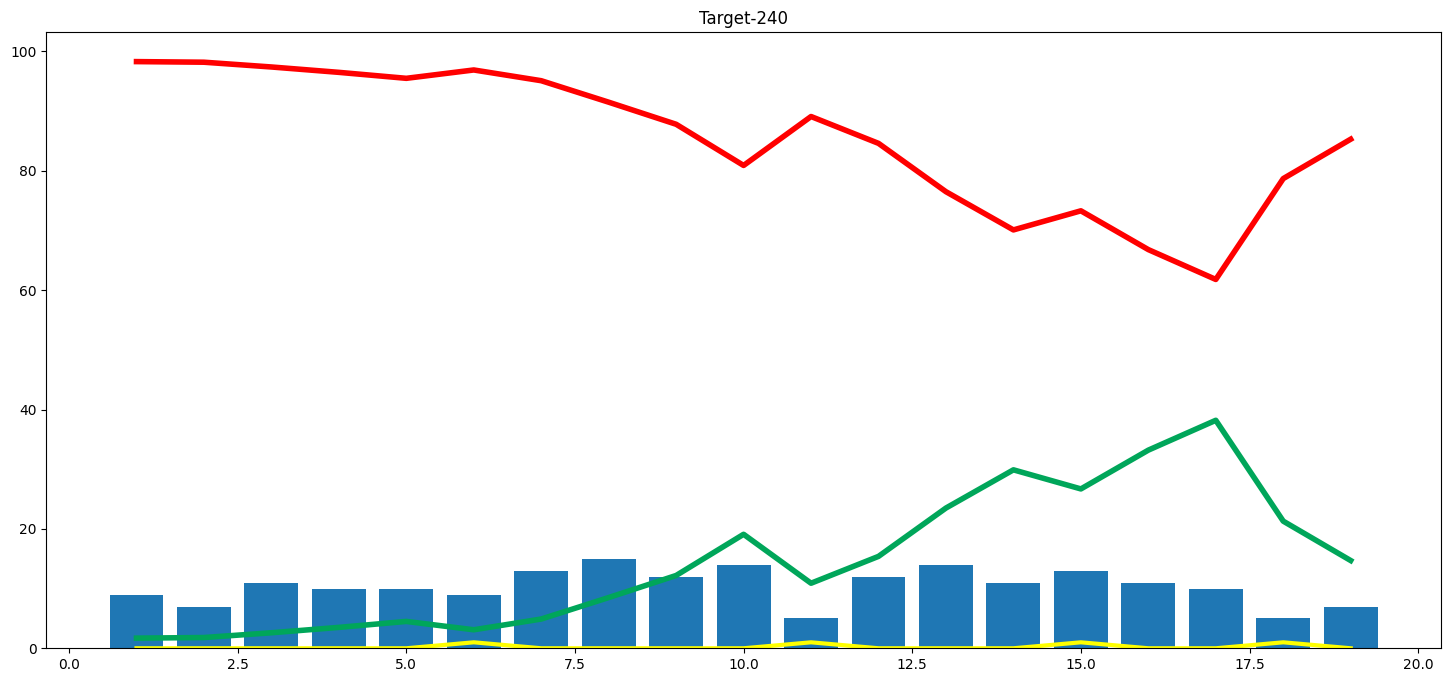

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [208]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))